<a href="https://colab.research.google.com/github/jnsbrdbr/mlproject/blob/master/CSV_heartattack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/ex01/heart.csv')

In [ ]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data['output'].value_counts()

,count
output,
1,165
0,138


In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


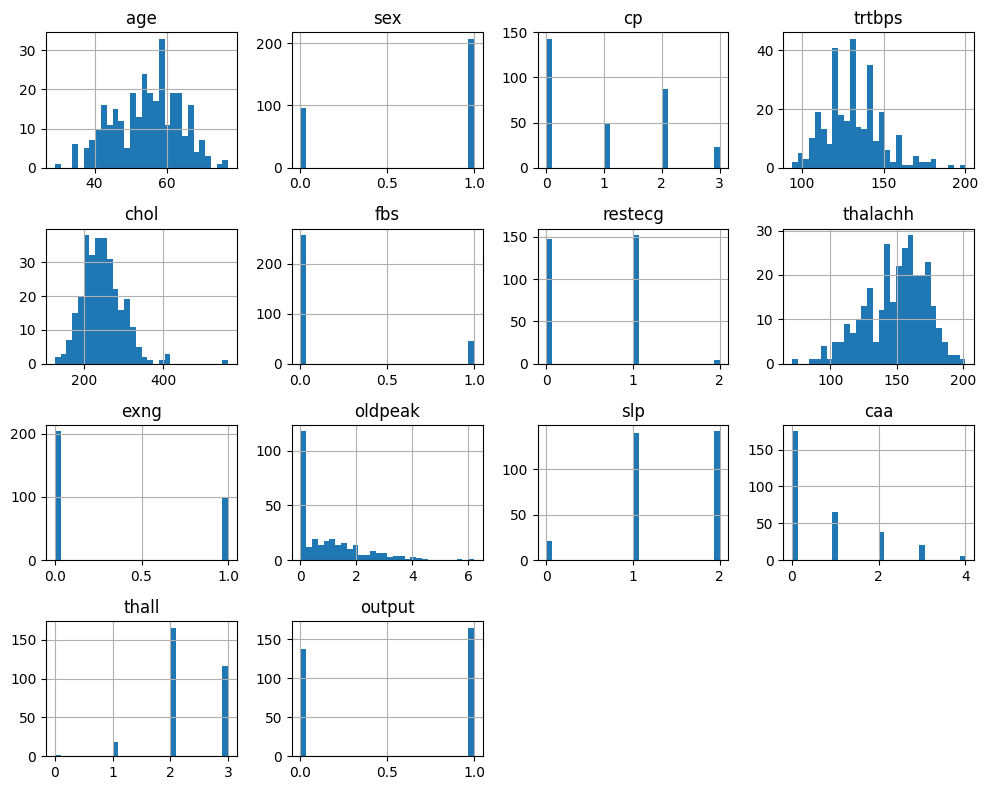

In [ ]:
data.hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()

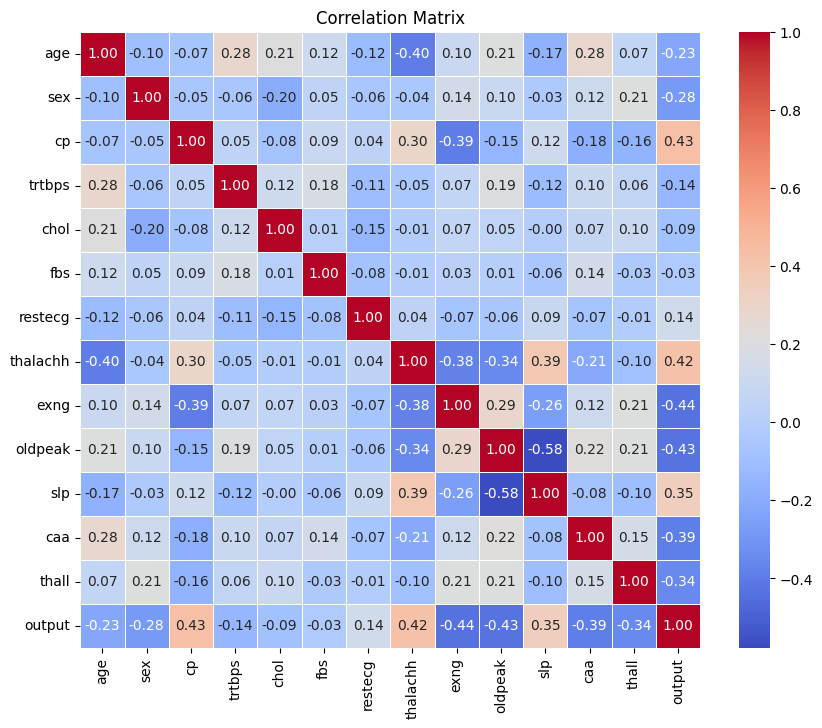

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
categorical_cols = ['sex', 'exang', 'cp', 'fbs', 'restecg', 'slp', 'caa', 'thall']
numerical_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


In [ ]:
data = pd.get_dummies(data, columns=['sex', 'exng', 'cp', 'fbs', 'restecg', 'slp', 'caa', 'thall'], drop_first=True)

In [ ]:
data

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,exng_1,cp_1,cp_2,...,restecg_2,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
299,45,110,264,132,1.2,0,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
300,68,144,193,141,3.4,0,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
301,57,130,131,115,1.2,0,True,True,False,False,...,False,True,False,True,False,False,False,False,False,True


In [ ]:
# Move 'output' column to the end
data = data[[col for col in data.columns if col != 'output'] + ['output']]


In [ ]:
data

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,cp_1,cp_2,cp_3,...,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,output
0,63,145,233,150,2.3,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,1
1,37,130,250,187,3.5,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,1
2,41,130,204,172,1.4,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,1
3,56,120,236,178,0.8,True,False,True,False,False,...,False,True,False,False,False,False,False,True,False,1
4,57,120,354,163,0.6,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,0
299,45,110,264,132,1.2,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,0
300,68,144,193,141,3.4,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,0
301,57,130,131,115,1.2,True,True,False,False,False,...,True,False,True,False,False,False,False,False,True,0


In [ ]:
X=data.iloc[:, :-1]
y=data['output']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [ ]:
data=pd.DataFrame(X_train)
data['output']=y_train

In [ ]:
data

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,cp_1,cp_2,cp_3,...,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,output
37,54,150,232,165,1.6,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,1
16,58,120,340,172,0.0,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,1
126,47,112,204,143,0.1,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,1
291,58,114,318,140,4.4,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,0
273,58,100,234,156,0.1,True,False,False,False,False,...,False,True,True,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,140,233,163,0.6,True,False,False,True,False,...,True,False,True,False,False,False,False,False,True,0
71,51,94,227,154,0.0,True,True,False,True,False,...,False,True,True,False,False,False,False,False,True,1
106,69,160,234,131,0.1,True,False,False,False,True,...,True,False,True,False,False,False,False,True,False,1
270,46,120,249,144,0.8,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,0


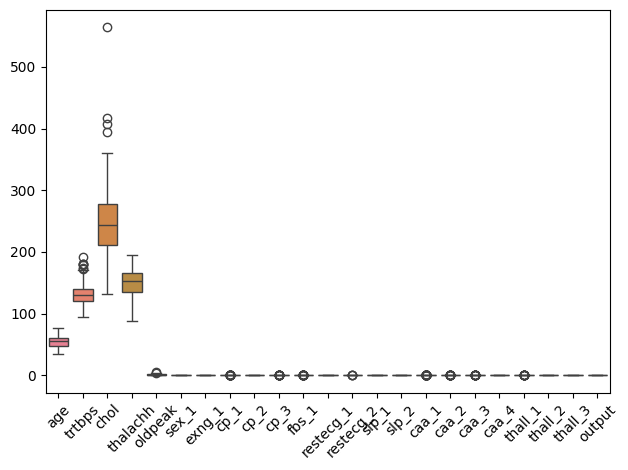

In [ ]:
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def cap_outliers_self(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return col.clip(lower, upper)


In [ ]:
def cap_outliers_from_train(train_col, test_col):
    Q1 = train_col.quantile(0.25)
    Q3 = train_col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return test_col.clip(lower, upper)


for col in ['chol', 'trtbps', 'thalachh']:
    X_train[col] = cap_outliers_self(X_train[col])
    X_test[col] = cap_outliers_from_train(X_train[col], X_test[col])


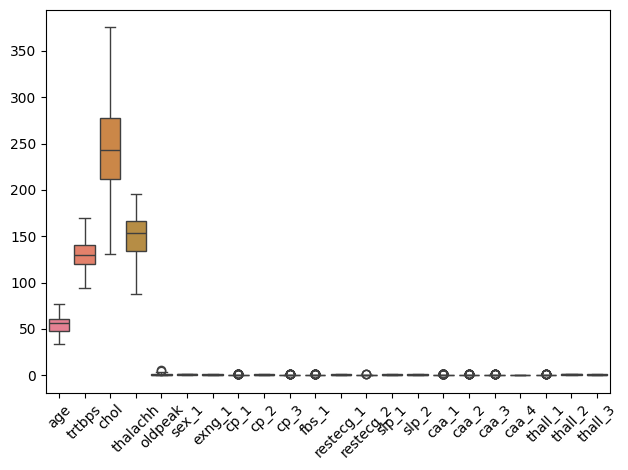

In [ ]:
sns.boxplot(data=X_train)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

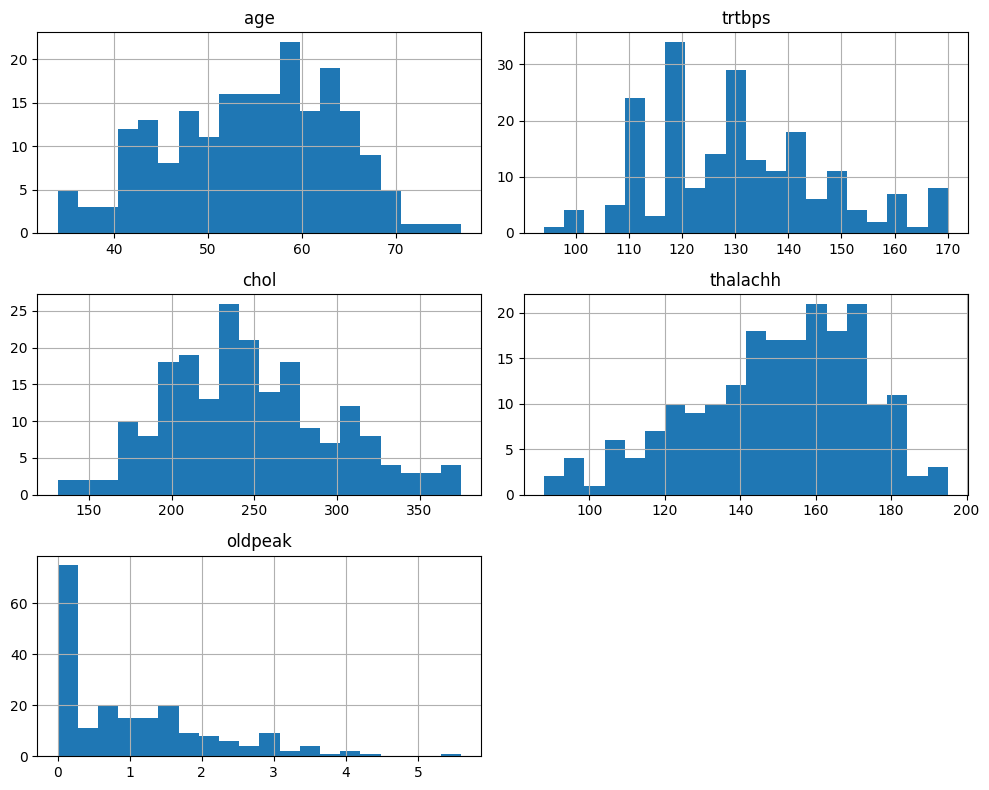

In [ ]:
X_train.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-val accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best cross-val accuracy: 0.8329268292682928
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.88      0.90      0.89        58

    accuracy                           0.87       100
   macro avg       0.87      0.86      0.87       100
weighted avg       0.87      0.87      0.87       100



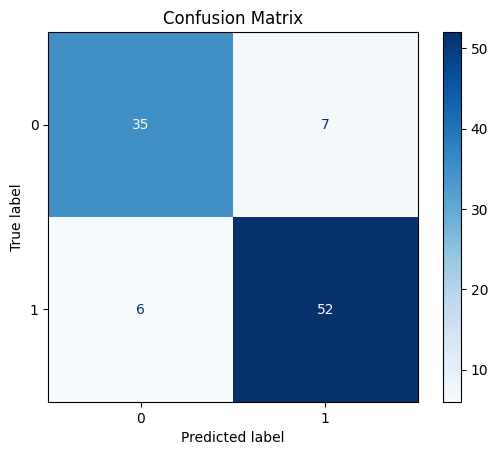

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')  # You can also try 'Reds', 'Greens', etc.
plt.title('Confusion Matrix')
plt.show()
